In [10]:
from matplotlib import use, cm
use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from sklearn import linear_model

from gradientDescent import gradientDescent
from computeCost import computeCost2,computeCost
from warmUpExercise import warmUpExercise
import time

## Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following modules
#  in this exericse:
#
#     warmUpExercise.py
#    * plotData.py
#     gradientDescent.py
#     computeCost.py
#     gradientDescentMulti.py
#     computeCostMulti.py
#     featureNormalize.py
#     normalEqn.py
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s


In [11]:
# ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.py
print ('Running warmUpExercise ...')
print ('5x5 Identity Matrix:')
warmup = warmUpExercise()
print (warmup)




Running warmUpExercise ...
5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Plotting Data ...


/tmp/ipykernel_221287/2302348048.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack(zip(np.ones(m),data[:,0]))


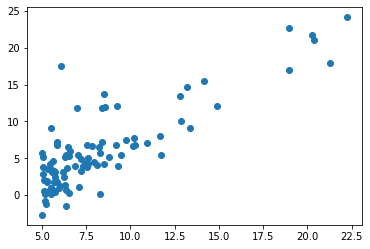

In [12]:
%matplotlib inline
# ======================= Part 2: Plotting =======================

data = np.loadtxt('ex1data1.txt', delimiter=',')
m = data.shape[0]
X = np.vstack(zip(np.ones(m),data[:,0]))
y = data[:, 1]
# Plot Data
# Note: You have to complete the code in plotData.py
print ('Plotting Data ...')
plt.figure()
plt.scatter(data[:,0],y)
plt.show()



In [16]:
# =================== Part 3: Gradient descent ===================
print('Running Gradient Descent ...')
theta = np.zeros(2)

# compute and display initial cost
start = time.time()
J = computeCost(X, y, theta)
end = time.time()
print ('cost: %0.4f ' % J,'time=',end-start)
start = time.time()
J = computeCost2(X, y, theta) # 矩阵运算
end = time.time()
print ('cost: %0.4f ' % J,'time=',end-start)

# Some gradient descent settings

iterations = 3000
alpha = 0.01

# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print ('Theta found by gradient descent: ')
print ('%s %s \n' % (theta[0], theta[1]))


Running Gradient Descent ...
cost: 32.0727  time= 0.0003676414489746094
cost: 32.0727  time= 0.00014710426330566406
Theta found by gradient descent: 
-3.8780511750501696 1.1912525031860843 



In [9]:
z = np.dot(X,theta)
#J = np.sum(y-z)*0.5/m
(y-z)**2

array([3.09478464e+02, 8.33605520e+01, 1.86650244e+02, 1.40517316e+02,
       4.65574229e+01, 1.41276996e+02, 1.89077129e+01, 1.44000000e+02,
       4.35428417e+01, 1.45664356e+01, 1.05768048e+01, 2.40405025e+02,
       9.95465601e+00, 5.22121856e+01, 5.12913792e-01, 1.23404664e+01,
       2.81409030e+01, 3.14462993e-01, 1.33356432e+01, 2.90445545e+01,
       9.85080996e+00, 4.73802289e+02, 1.81731690e+01, 2.69101562e+01,
       9.50180625e+00, 5.12479044e+02, 1.82277001e+02, 4.96559809e+01,
       2.15854864e+02, 5.83077609e+02, 1.48840000e+00, 3.59592116e+01,
       1.47233956e+02, 3.42065025e+00, 4.28056148e+01, 2.08145813e+01,
       1.69447490e+01, 1.15110918e+01, 1.02353689e+02, 3.02214068e+01,
       3.09770165e-01, 1.52998323e+01, 2.90025332e+01, 5.95652836e+00,
       4.53171312e+01, 1.09474369e+00, 2.63548757e+01, 3.40033600e+00,
       6.40688185e+01, 1.03612041e+00, 4.55679002e+01, 3.38412816e+00,
       1.83912322e+01, 2.49810036e+01, 2.02578289e+00, 2.01952521e+00,
      

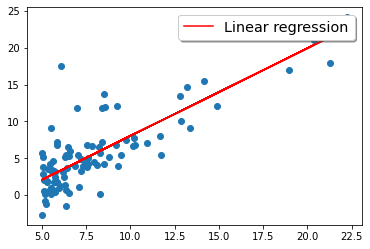

For population = 35,000, we predict a profit of 2913.3259
For population = 70,000, we predict a profit of 44607.1635


In [5]:
# Plot the linear fit
plt.figure()
plt.scatter(data[:,0],y)

plt.plot(X[:, 1], X.dot(theta), '-', label='Linear regression',c='r')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print ('For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000))
print ('For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000))

Visualizing J(theta_0, theta_1) ...


/tmp/ipykernel_193710/316262901.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


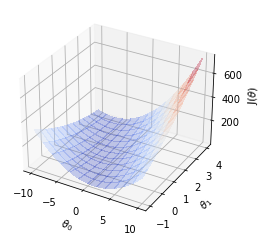

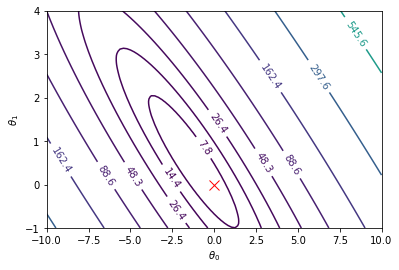

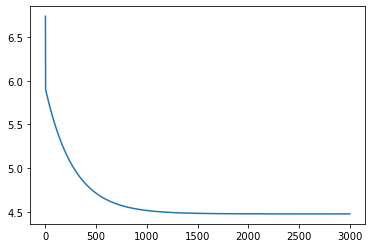

In [6]:

# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print ('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(computeCost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')
plt.show()

#raw_input("Program paused. Press Enter to continue...")

# Contour plot
plt.figure()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.clabel(ax, inline=1, fontsize=10)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)
plt.show()

# Plot J_history
plt.figure()
plt.plot(range(iterations),J_history)
plt.show()
#raw_input("Program paused. Press Enter to continue...")

Theta found by scikit: 
-3.8957808783118537 1.1930336441895935 

For population = 35,000, we predict a profit of 2798.3688
For population = 70,000, we predict a profit of 44554.5463


<Figure size 432x288 with 0 Axes>

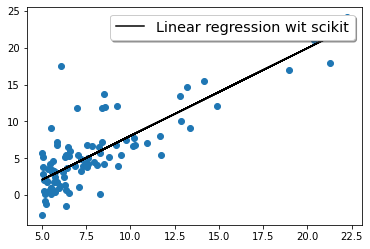

In [7]:
# =============Use Scikit-learn =============
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X, y)

print ('Theta found by scikit: ')
print ('%s %s \n' % (regr.coef_[0], regr.coef_[1]))

predict1 = np.array([1, 3.5]).dot(regr.coef_)
predict2 = np.array([1, 7]).dot(regr.coef_)
print ('For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000))
print ('For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000))

plt.figure()
plt.figure()
plt.scatter(data[:,0],y)

plt.plot(X[:, 1],  X.dot(regr.coef_), '-', color='black', label='Linear regression wit scikit')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.show()


In [8]:
np.vstack(zip(np.ones(2),np.array([1,2]))

SyntaxError: unexpected EOF while parsing (1111574764.py, line 1)

array([1., 1., 1.])